In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="#009e84"> ch02. 한글 형태소 분석 </font></b>

# 1. 자연어 처리

- 자연어 : 일상적인 언어
- 자연어 처리 분야
    - 자연어 이해 : 형태소 분석 → pos tagging(품사태깅) → 의미분석(빈도분석, 연관분석)
    - 자연어 이해 & 생성 : RNN / LSTM / GRU → seq2seq → 트랜스포머
- 활용분야 : 트렌드 분석, 탐색적 분석, 맞춤법 검사, 번역기, 챗봇

# 2. 자연어 이해/생성 처리 절차

- 전처리 : 단어/어절 추출(특수문자 ㅎㅎ 제외)
- 분석후보 생성 : 형태소분리, 품사태깅
- 제약 조건 : 불용어 처리, 규칙 확인
- 분석 : 시각화(워드클라우드, Text), 유사성 분석, 연관 분석, RNN / LSTM / GRU, ...

# 3. 형태소 분석 엔진

- Konlpy (pip install konlpy)
    - HanNanum : Java로 만든 형태소 분석기(JAVA_HOME 환경변수, Path설정)
    - Kkma     : Java로 만든 형태소 분석기(JAVA_HOME 환경변수, Path설정)
    - Komoran  : Java로 만든 형태소 분석기(JAVA_HOME 환경변수, Path설정)
    - Okt      : Java로 만든 형태소 분석기(JAVA_HOME 환경변수, Path설정)
- Mecab (pip install python-mecab-ko)
    - Mecab : C++로 만든 형태소 분석기. 저사양 환경에서 사용가능
- 공통기능 : morphs(형태소 나누기), nouns(명사추출), pos(형태소로 나누어 품사태그)
- pos tagging chat 다운로드
    - 구글에서 konlpy dosc → https://konlpy.org/en/latest/
    - API메뉴 → 'Comparison between POS tagging classes'클릭 → 'Korean POS tags comparison chart' 다운로드

In [ ]:
%pip install konlpy

In [ ]:
%pip install  python-mecab-ko

In [ ]:
%pip install wordcloud

In [ ]:
%pip install gensim

In [10]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [11]:
import konlpy
konlpy.__version__ # 에러나는 경우 jpype1라이브러리를 수동 설치(현버전에서는 X)

'0.6.0'

## 3.1 HanNanum

In [1]:
text = '아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다.'

In [2]:
from konlpy.tag import Hannanum

# Hannamum객체 생성
hannanum = Hannanum(jvmpath=None,      # 기본값
                    ) # 메모리. 기본값 : 1024(메가) / 1g(1기가) / 10m(10메가)

# 입력된 텍스트를 가장 세밀하게 분석해서 형태소, 품사, 원형 등의 후보군을 모두 출력하여 반환
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [3]:
# 형태소 분석 : morphs

print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [4]:
# 명사만 추출 : nouns

print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [5]:
# 품사태그 : pos

print(hannanum.pos(text, ntags=9)) # 품사 갯수 기본값 : ntags=9 / 엑셀도표에 있는 수를 써야함

[('아름답', 'P'), ('지만', 'E'), ('다소', 'M'), ('복잡', 'N'), ('하', 'X'), ('기', 'E'), ('도', 'J'), ('하', 'P'), ('ㄴ', 'E'), ('한국어', 'N'), ('는', 'J'), ('전세계', 'N'), ('에서', 'J'), ('13번', 'N'), ('째', 'X'), ('로', 'J'), ('많', 'P'), ('이', 'X'), ('사용', 'N'), ('되', 'X'), ('는', 'E'), ('언어', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]


In [6]:
print(hannanum.pos(text, ntags=22)) 

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [8]:
# 퀴즈 1) pos tag 결과에서 명사(NC, NQ, NB)만 추출하기

tagged_text = hannanum.pos(text, ntags=22)
[token for token, tag in tagged_text if tag in ('NC','NQ','NB','NN')]

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']

In [9]:
# 퀴즈 2) pos tag 결과에서 보통명사(NC)만 추출하기

[token for token, tag in tagged_text if tag == 'NC']

['복잡', '한국어', '전세계', '사용', '언어']

In [10]:
# 퀴즈 3) pos tag 결과에서 형용사(PA)만 추출하기

[token for token, tag in tagged_text if tag == 'PA']

['아름답', '많']

## 3.2 Kkma

In [11]:
from konlpy.tag import Kkma

kkma = Kkma()

# 형태소 분석
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [12]:
# 명사추출

print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [13]:
# 품사 태그

print(kkma.pos(text))

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [14]:
# 품사태그를 통해 명사(NNG, NNP, NNB, NNM, NR, NP)만 추출

tagged_text = kkma.pos(text)
[token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NNM', 'NR', 'NP')]

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']

In [15]:
# 품사태그를 통해 보통명사(NNG)만 추출

[token for token, tag in tagged_text if tag == 'NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3 Komoran

In [2]:
from konlpy.tag import Komoran

komoran = Komoran()

# 형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [3]:
# 명사 추출

print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [4]:
# 품사 태그

print(komoran.pos(text))

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [6]:
# 품사태그를 통해 명사(NNG, NNP, NNB, NR, NP)만 추출

tagged_text = komoran.pos(text)
[token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NR', 'NP')]

['한국어', '전', '세계', '번', '사용', '언어']

In [7]:
# 품사태그를 통해 보통명사(NNG)만 추출

[token for token, tag in tagged_text if tag == 'NNG']

['전', '세계', '사용', '언어']

## 3.4 Twitter(Okt : Open Korean Text)

- SNS 텍스트 분석용 개발
- 속도가 빠름

In [11]:
%%time
from konlpy.tag import Okt

okt = Okt()
# print('명사구 추출 :', okt.phrases(text)) 다른것과 달리 이런게 있지만 별로 쓸일이 없다.
print('형태소 추출 :', okt.morphs(text))
print('명사 추출 :', okt.nouns(text))

tagged_text = okt.pos(text)
print('품사 태깅을 이용한 명사 추출 :', [token for token, tag in tagged_text if tag == 'Noun'])
print('품사 태깅 :', tagged_text)

형태소 추출 : ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다', '.']
명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅 : [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
CPU times: total: 93.8 ms
Wall time: 25.1 ms


## 3.5 Mecab

- pip install python-mecab-ko
- 압도적 속도(konlpy 대비 5~15배 빠름)
- 낮은 메모리 사용량
- 형태소 분해 정확도 높음

In [3]:
%%time
from mecab import MeCab

mecab = MeCab()
print('형태소 추출 :', mecab.morphs(text))
print('명사 추출 :', mecab.nouns(text))
tagged_text = mecab.pos(text)
print('품사 태깅을 이용한 명사 추출 :', [token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NNBC', 'NR', 'NP')])
print('품사 태깅 :', tagged_text)

형태소 추출 : ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다', '.']
명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅을 이용한 명사 추출 : ['한국어', '세계', '번', '사용', '언어']
품사 태깅 : [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
CPU times: total: 0 ns
Wall time: 4.98 ms


# 4. 말뭉치

In [9]:
# 영어 말뭉치

import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print('글자수 :', len(emma))

글자수 : 887071


In [8]:
# 한글 말뭉치

from konlpy.corpus import kolaw
# data = kolaw.open('constitution.txt').readlines() # 한줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수 :', len(data))

글자수 : 18884


# 5. 워드클라우드

- pip install wordcloud

In [10]:
nouns = ['word1', 'word2', 'word1', 'word2']
' '.join(nouns)

'word1 word2 word1 word2'

In [16]:
# emma 말뭉치에서 단어(특수문자 제외)추출 → 명사(NN, NNS, NNP, NNPS)추출 → 연결 → 워드클라우드

# import
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

# 단어들 추출
ret = RegexpTokenizer('\w{2,}')
words = ret.tokenize(emma)

# pos tagging → 명사 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN', 'NNS', 'NNP', 'NNPS')]

# 연결
emma_noun = ' '.join(noun_list)
print('워드 클라우드를 그릴 text 내용 :', emma_noun[:20])

워드 클라우드를 그릴 text 내용 : Emma Jane Austen VOL


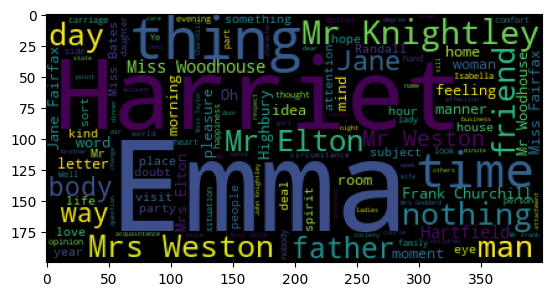

In [18]:
# 기본 워드 클라우드

from wordcloud import WordCloud
from matplotlib import pyplot as plt

wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

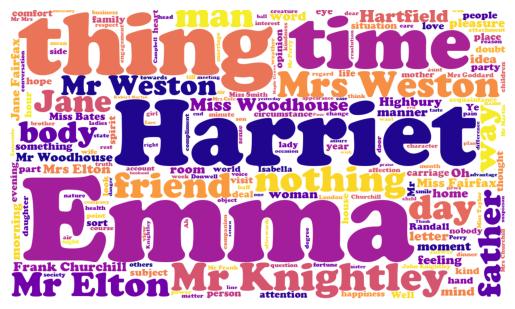

In [46]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/COOPBL.TTF',
                      background_color='white', # 배경색
                      width=1200, height=700,   # 생성될 이미지 가로 세로(픽셀)
                      max_words=200,            # 최대 표시될 단어수
                      relative_scaling=0.5,     # 단어 빈도에 따른 크기 차이 조정
                      colormap='plasma',        # 글씨 컬러맵
                      max_font_size=300,        # 최대 폰트 사이즈
                      min_font_size=10,         # 최소 폰트 사이즈
                      random_state=5            # 결과를 일관되도록 그리기 위한 random sead값
                     )
wordcloud.generate(emma_noun)
# plt.figure(figsize=(20,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [54]:
# data 말뭉치에서 명사(NN, NNS, NNP, NNPS)추출 → 연결 → 워드클라우드

from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = MeCab() # NNG, NNP, NP
# noun_list = analyzer.nouns(data)
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP', 'NP')]

# data 한글 말뭉치로 워드 count
from nltk import FreqDist
import pandas as pd

noun_wordcount = FreqDist(noun_list)
wordcnt = pd.Series(noun_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(10)

법률     121
대통령     84
조       79
국가      73
국회      69
헌법      69
국민      69
때       55
필요      31
위원      30
dtype: int64

In [57]:
data_noun = ' '.join(noun_list)
print('명사 추출 :', noun_list[:5])
print('워드클라우드를 그릴 data :', data_noun[:20])

명사 추출 : ['대한민국', '헌법', '역사', '전통', '우리']
워드클라우드를 그릴 data : 대한민국 헌법 역사 전통 우리 국민 


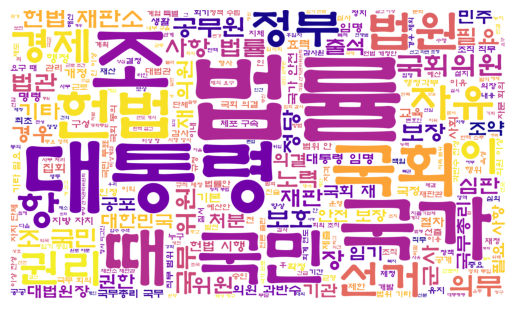

In [67]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='plasma',
                      width=1200, height=700)
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [68]:
# 불용어(불용어지정 + 불용어사전)

from wordcloud import STOPWORDS
# 다른 라이브러리에 stopwords가 있어서 이것만은 한글로 변수이름을 많이들 쓴다
불용어 = STOPWORDS | {'대통령','조','때','항'}  # | : 집합 합 연산자 . 그런데 STOPWORDS에 있는 불용어는 다 영어.
불용어 = {'대통령','조','때','항'}
불용어

{'대통령', '때', '조', '항'}

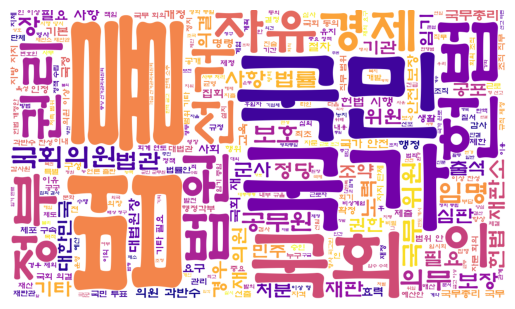

In [69]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='plasma',
                      width=1200, height=700,
                      stopwords=불용어) # 불용어
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1280, 1280, 3))

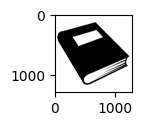

In [70]:
# 이미지를 넘파이배열로(방법1)

import cv2 

mask = cv2.imread('data/book.png')
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 3채널 이미지 : 컬러

(numpy.ndarray, (1280, 1280, 4))

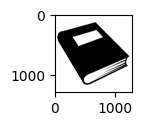

In [74]:
# 이미지를 넘파이배열로(방법2)

from PIL import Image
import numpy as np

img = Image.open('data/book.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 4채널 : 투명/반투명 여부를 표현하는 채널

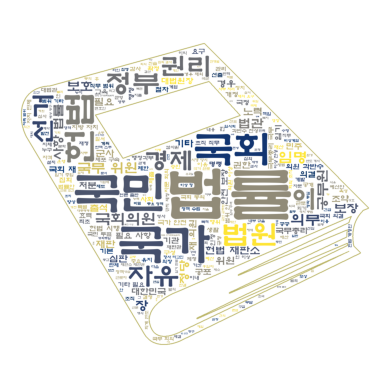

In [79]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=700,
                      stopwords=불용어,
                      mask=mask,
                      contour_width=2,     # 테두리 두께
                      contour_color='darkkhaki') # 테두리 색상
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1600, 1600))

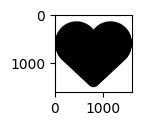

In [80]:
# mask = cv2.imread('data/heart.jpg')
img = Image.open('data/heart.jpg')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask, cmap='gray')
type(mask), mask.shape 

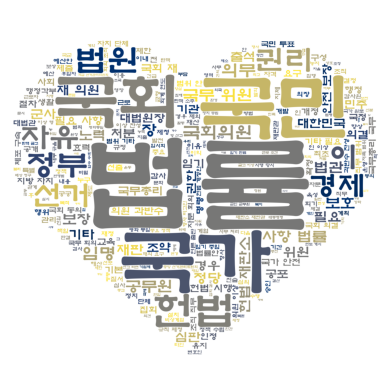

In [81]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=700,
                      stopwords=불용어,
                      mask=mask) 
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (241, 257, 3))

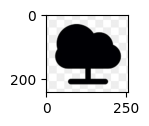

In [82]:
mask2 = cv2.imread('data/test2.jpg')
plt.figure(figsize=(2,1))
plt.imshow(mask2)
type(mask2), mask2.shape # 3채널 컬러

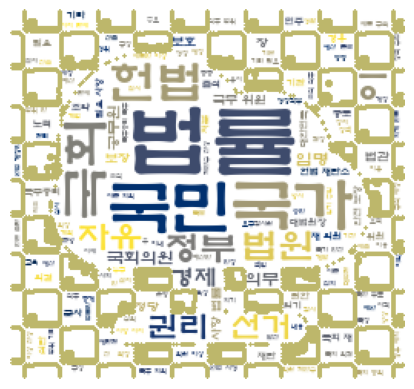

In [84]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=700,
                      stopwords=불용어,
                      mask=mask2,
                      contour_width=2,     # 테두리 두께
                      contour_color='darkkhaki') # 테두리 색상
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

mask 데이터 하나하나의 타입 : uint8
mask 데이터 하나하나의 타입 : uint8


(numpy.ndarray, (241, 257, 3))

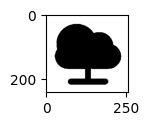

In [89]:
# 이미지 전처리 : 옅은 회색 → 흰색

mask = cv2.imread('data/test2.jpg')
print('mask 데이터 하나하나의 타입 :', mask.dtype) # uint8
mask = np.where(mask>200, 255, 0).astype(np.uint8) # mask가 200보다 크면 255, 그거보다 작으면 0으로해라
print('mask 데이터 하나하나의 타입 :', mask.dtype) # int32. 이게 uint8 이어야함

plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape # 3채널 컬러

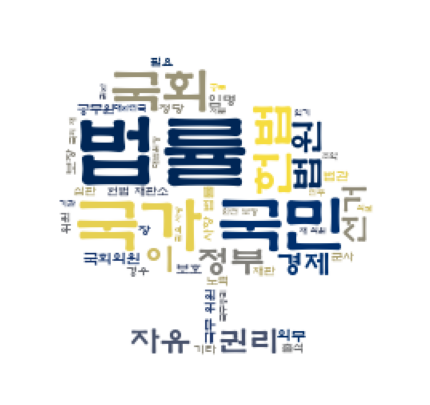

In [96]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=800,
                      stopwords=불용어,
                      mask=mask)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1124, 720))

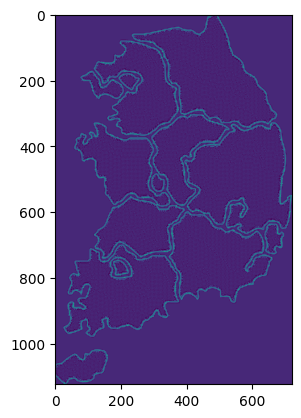

In [98]:
img = Image.open('data/south_korea.png')
mask = np.array(img)
# plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

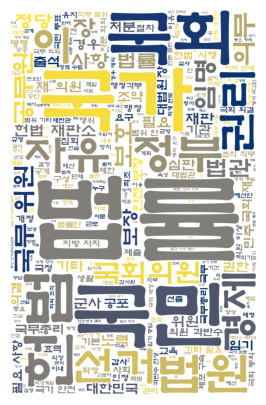

In [99]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=800,
                      stopwords=불용어,
                      mask=mask)
wordcloud.generate(data_noun)
plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1124, 720, 3))

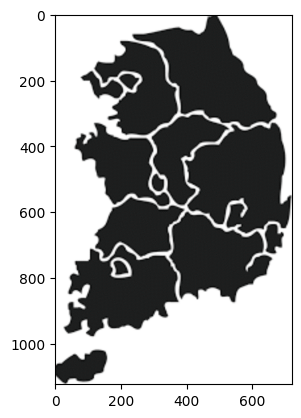

In [100]:
# 1채널 이미지 → 3채널 : convert('RGB')

img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
# plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

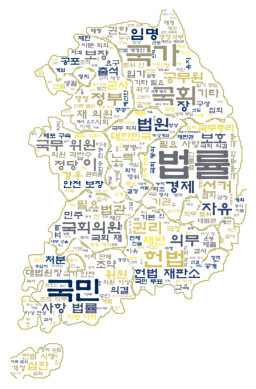

In [106]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/HMFMOLD.TTF',
                      background_color='white',
                      max_words=300,
                      relative_scaling=0.6,
                      colormap='cividis',
                      width=1200, height=1500,
                      stopwords=불용어,
                      mask=mask,
                      contour_width=2,     
                      contour_color='darkkhaki')
wordcloud.generate(data_noun)
# plt.figure(figsize=(18,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [107]:
# 생성된 wordcloud 저장

wordcloud.to_file('data/korea.jpg') # jpg나 png로만 저장

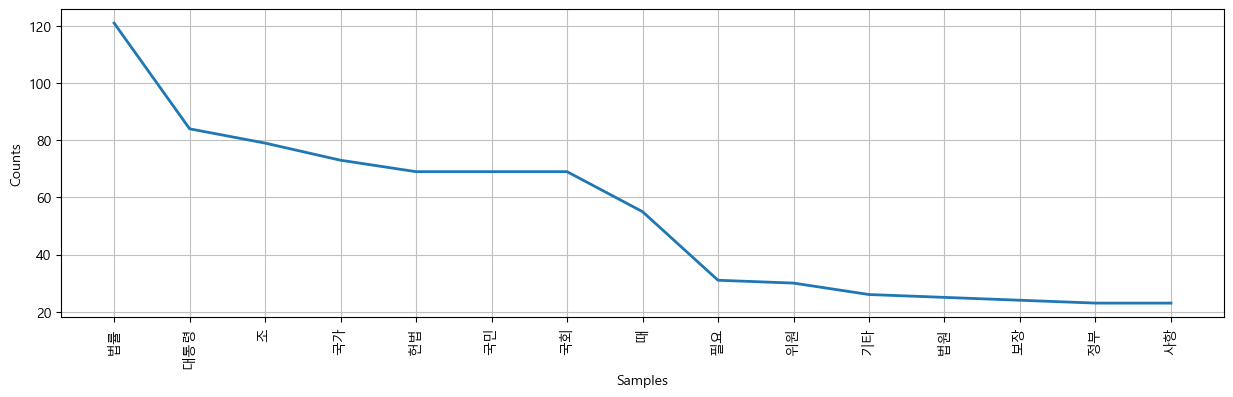

In [108]:
# 단어의 빈도수를 그래프로 시각화

import nltk
data_text = nltk.Text(noun_list)
plt.figure(figsize=(15,4))
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)
plt.show()

# 6. 워드 임베딩

- 단어간 벡터 계산 → 단어간 거리 유사성 도출

In [10]:
import requests
from bs4 import BeautifulSoup
from mecab import MeCab

rss_url = 'https://fs.jtbc.co.kr/RSS/economy.xml'
jtbc_response = requests.get(rss_url)
soup = BeautifulSoup(jtbc_response.content, 'xml')
item_elems = soup.find_all('item') # item_elems = soup.select('item')

# 객체생성
mecab = MeCab()

# title, description for문
news = []
for item_elem in item_elems:
    title = item_elem.find('title').text
    description = item_elem.find('description').text
    total_text = title + ' ' + description # 스페이스바를 넣어야 어제처럼 가능
    # noun_list = mecab.nouns(total_text) # 의존명사 포함되어있음
    noun_list = [word for word, tag in mecab.pos(total_text) if tag in ('NNG','NNP')] # NNG, NNP(보통명사 고유명사)
    news.append(noun_list)
print(news[:3])

[['둔촌', '주공', '전세', '홍수', '예상', '눈치', '게임', '시작', '앵커', '단군', '최대', '규모', '재건축', '둔촌', '주공', '아파트', '입주', '다음', '달', '시작', '규모', '입주', '전세', '매물', '현장', '분위기'], ['실제', '캠', '핑장', '관리', '소홀', '앵커', '캠', '핑장', '예약', '때', '예약', '플랫폼', '사진', '실제', '불만', '경우', '앞', '예약', '플랫', '폼', '책임', '강화', '아람', '기자', '기자', '인터넷', '카페'], ['요즘', '편의점', '정도', '앵커', '육박', '점심', '값', '편의점', '도시락', '때', '편의점', '도시락', '식비', '부담', '아람', '기자', '기자', '서울']]


In [11]:
# 워드임베딩(Word2Vec) : 단어간 거리 계산
# pip install gensim

from gensim.models import Word2Vec
model = Word2Vec(news,        # 학습데이터. 2차원으로 넣어야함
                 window=10,   # 각 단어의 좌우 10개 단어만 학습 컨텐츠로 사용
                 min_count=2, # 학습데이터에서 2회 이상 등장한 단어만 학습
                 workers=-1,  # 병렬처리할 core의 수(-1:모든 코어를 사용)
                 sg=1)        # 소량의 데이터일 경우 중심단어로 주변단어를 예측하도록 학습

In [16]:
model.wv.most_similar('하이닉스', topn=5) # 아파트와 가깝다고 생각하는 것 순서대로 topn개 출력. 없는 단어 넣으면 에러남

[('서민', 0.181283101439476),
 ('둔촌', 0.16641782224178314),
 ('예상', 0.16468901932239532),
 ('아파트', 0.16407820582389832),
 ('정부', 0.15974178910255432)]

In [15]:
# Word2Vec이 학습한 전체단어 어휘집

print(model.wv.index_to_key)

['앵커', '정부', '기자', '경제', '편의점', '도시락', '분기', '결혼', '말', '아람', '지원', '이상', '전어', '가을', '실적', '최고', '비정규직', '올해', '내년', '부부', '예비', '오늘', '서울', '예약', '아파트', '지수', '증시', '뉴욕', '대출', '티몬', '상태', '재무', '제철', '폭염', '배', '최근', '가격', '사상', '역대', '비용', '최대', '예상', '연속', '디딤돌', '서민', '전국', '거래', '피해', '확인', '사실', '매출', '업체', '입점', '사업', '직전', '사태', '정산', '미', '위', '책정', '예산', '상황', '갈치', '꽃게', '량', '조업', '탓', '여름', '황금연휴', '추석', '배추', '영향', '메모리', '급', '삼성전자', '하이닉스', '수출', '어제', '대통령', '기준', '근로자', '임금', '비중', '정', '소식', '결혼식', '현실', '문제', '걱정', '주가', '아연', '고려', '롤러코스터', '값', '정도', '앞', '때', '핑장', '캠', '실제', '입주', '규모', '시작', '전세', '주공', '둔촌']


In [17]:
# 유사한 단어 출력

print('입력한 단어와 유사한 단어 10개를 출력합니다.')
key = input()
if key in model.wv:
    print(f'{key}와 유사한 단어들')
    print(model.wv.most_similar(key))
else:
    print(f'{key} 단어가 훈련 데이터에 없습니다')

입력한 단어와 유사한 단어 10개를 출력합니다.
가을
가을와 유사한 단어들
[('편의점', 0.25290459394454956), ('추석', 0.22568336129188538), ('급', 0.20718970894813538), ('아연', 0.1781422644853592), ('상황', 0.1678573042154312), ('값', 0.15339641273021698), ('지수', 0.149579718708992), ('예약', 0.14717479050159454), ('내년', 0.14256367087364197), ('정부', 0.13725271821022034)]
